## Mobile Price Prediction 

### Importing Libraries 

In [706]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

#### Load Data 

In [707]:
df = pd.read_csv('Flipkart Mobile.csv')

In [708]:
df.head()
df.shape

(28536, 9)

### Removing unnessisaary Columns

In [709]:
df.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [710]:
df.head()

,Model Name,Price,Memory,Rating,Display,Camera,Battery,Processor
0,"vivo T3 Pro 5G (Sandstone Orange, 256 GB)","₹31,999",8 GB RAM | 256 GB ROM,4.5,17.2 cm (6.77 inch) Full HD+ AMOLED Display,50MP + 8MP | 16MP Front Camera,5500 mAh Battery,Snapdragon 7 Gen 3 Processor
1,"vivo T3 Pro 5G (Emerald Green, 256 GB)","₹31,999",8 GB RAM | 256 GB ROM,4.5,17.2 cm (6.77 inch) Full HD+ AMOLED Display,50MP + 8MP | 16MP Front Camera,5500 mAh Battery,Snapdragon 7 Gen 3 Processor
2,"MOTOROLA Edge 50 (Jungle Green, 256 GB)","₹32,999",8 GB RAM | 256 GB ROM,4.3,16.94 cm (6.67 inch) Display,50MP + 13MP + 10MP | 32MP Front Camera,5000 mAh Battery,Snapdragon 7 Gen 1 Accelerated Edition Processor
3,"MOTOROLA Edge 50 (Koala Grey, 256 GB)","₹32,999",8 GB RAM | 256 GB ROM,4.3,16.94 cm (6.67 inch) Display,50MP + 13MP + 10MP | 32MP Front Camera,5000 mAh Battery,Snapdragon 7 Gen 1 Accelerated Edition Processor
4,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)","₹32,999",12 GB RAM | 256 GB ROM,4.3,16.94 cm (6.67 inch) Display,200MP (OIS) + 8MP + 2MP | 16MP Front Camera,5100 mAh Battery,7s Gen 2 Mobile Platform 5G Processor


In [711]:
# check for missing values 
df.isnull().sum()

Model Name       0
Price         2807
Memory           0
Rating         173
Display          0
Camera           0
Battery          0
Processor        0
dtype: int64

In [712]:
# summary 
df.describe()

,Rating
count,28363.000000
mean,4.270483
std,0.179429
min,3.400000
25%,4.200000
50%,4.300000
75%,4.400000
max,4.900000


In [713]:
# remove null values 
df.dropna(inplace=True)

In [714]:
df.isnull().sum()

Model Name    0
Price         0
Memory        0
Rating        0
Display       0
Camera        0
Battery       0
Processor     0
dtype: int64

### Data Cleaning

In [715]:


df['Price'] = df['Price'].str.replace("₹", "").str.replace(",", "").astype(int)

In [716]:
df['Brand'] =  df['Model Name'].apply(lambda x : x.split(' ')[0])

In [717]:
df['Battery'] = df['Battery'].apply(lambda x : x.split(' ')[0])

In [718]:
def is5g(string):
    if '5G' in string:
         return 1
    else :
         return 0
df['Is5G'] = df['Model Name'].apply(is5g)

In [719]:
df['RAM'] = df['Memory'].apply(lambda x: x.split('|')[0].split(' ')[0])

In [720]:
df['ROM'] = df['Memory'].apply(lambda x: x.split('|')[1].split(' ')[1] if '|' in str(x) and len(x.split('|')) > 1 else None)

In [721]:
df['rear_camera'] = df['Camera'].apply(lambda x: x.split('|')[0].split('+')[0].split('M')[0])

In [722]:
df['front_camera'] = df['Camera'].apply(lambda x: x.split('|')[1].split('+')[0].split('M')[0] if '|' in str(x) and len(x.split('|')) > 1 else np.nan)

In [723]:
df.head()

,Model Name,Price,Memory,Rating,Display,Camera,Battery,Processor,Brand,Is5G,RAM,ROM,rear_camera,front_camera
0,"vivo T3 Pro 5G (Sandstone Orange, 256 GB)",31999,8 GB RAM | 256 GB ROM,4.5,17.2 cm (6.77 inch) Full HD+ AMOLED Display,50MP + 8MP | 16MP Front Camera,5500,Snapdragon 7 Gen 3 Processor,vivo,1,8,256,50,16
1,"vivo T3 Pro 5G (Emerald Green, 256 GB)",31999,8 GB RAM | 256 GB ROM,4.5,17.2 cm (6.77 inch) Full HD+ AMOLED Display,50MP + 8MP | 16MP Front Camera,5500,Snapdragon 7 Gen 3 Processor,vivo,1,8,256,50,16
2,"MOTOROLA Edge 50 (Jungle Green, 256 GB)",32999,8 GB RAM | 256 GB ROM,4.3,16.94 cm (6.67 inch) Display,50MP + 13MP + 10MP | 32MP Front Camera,5000,Snapdragon 7 Gen 1 Accelerated Edition Processor,MOTOROLA,0,8,256,50,32
3,"MOTOROLA Edge 50 (Koala Grey, 256 GB)",32999,8 GB RAM | 256 GB ROM,4.3,16.94 cm (6.67 inch) Display,50MP + 13MP + 10MP | 32MP Front Camera,5000,Snapdragon 7 Gen 1 Accelerated Edition Processor,MOTOROLA,0,8,256,50,32
4,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",32999,12 GB RAM | 256 GB ROM,4.3,16.94 cm (6.67 inch) Display,200MP (OIS) + 8MP + 2MP | 16MP Front Camera,5100,7s Gen 2 Mobile Platform 5G Processor,REDMI,1,12,256,200,16


In [724]:
df['display'] = df['Display'].apply(lambda x:x.split(' ')[2].split('(')[1])

In [725]:
def isAMoled(string):
    if 'AMOLED' in string:
         return 1
    else :
         return 0
df['IsAMOLED'] = df['Display'].apply(isAMoled)        

In [726]:
df.drop(columns=['Memory','Camera','Display','Model Name'],inplace= True)

In [727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25556 entries, 0 to 28535
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         25556 non-null  int32  
 1   Rating        25556 non-null  float64
 2   Battery       25556 non-null  object 
 3   Processor     25556 non-null  object 
 4   Brand         25556 non-null  object 
 5   Is5G          25556 non-null  int64  
 6   RAM           25556 non-null  object 
 7   ROM           25351 non-null  object 
 8   rear_camera   25556 non-null  object 
 9   front_camera  19946 non-null  object 
 10  display       25556 non-null  object 
 11  IsAMOLED      25556 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 2.4+ MB


In [728]:
df.dropna(inplace=True)

In [729]:

df['RAM'] = df['RAM'].astype('int64') 
df['ROM'] = df['ROM'].astype('int64') 
df['rear_camera'] = df['rear_camera'].astype('int64') 
df['front_camera'] = df['front_camera'].astype(str).str.strip()  # Remove spaces
df['front_camera'] = pd.to_numeric(df['front_camera'], errors='coerce')  # Convert to numeric
df['front_camera'] = df['front_camera'].fillna(0).astype(int) 
df['display'] = df['display'].astype('float64') 



In [730]:
temp = df.copy()
temp.to_csv('mobile_data.csv')

In [731]:
df.head()

,Price,Rating,Battery,Processor,Brand,Is5G,RAM,ROM,rear_camera,front_camera,display,IsAMOLED
0,31999,4.5,5500,Snapdragon 7 Gen 3 Processor,vivo,1,8,256,50,16,6.77,1
1,31999,4.5,5500,Snapdragon 7 Gen 3 Processor,vivo,1,8,256,50,16,6.77,1
2,32999,4.3,5000,Snapdragon 7 Gen 1 Accelerated Edition Processor,MOTOROLA,0,8,256,50,32,6.67,0
3,32999,4.3,5000,Snapdragon 7 Gen 1 Accelerated Edition Processor,MOTOROLA,0,8,256,50,32,6.67,0
4,32999,4.3,5100,7s Gen 2 Mobile Platform 5G Processor,REDMI,1,12,256,200,16,6.67,0


###  EDA & Data Visualization 

<function matplotlib.pyplot.show(close=None, block=None)>

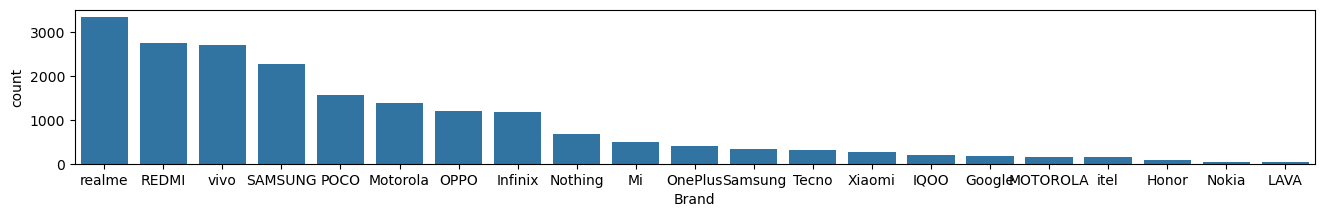

In [732]:
# on Brand 
import seaborn as sns 
plt.figure(figsize=(16,2))
sns.barplot(df['Brand'].value_counts())
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

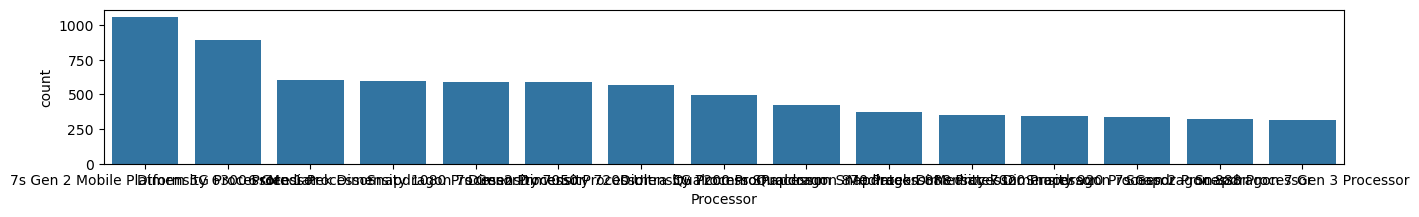

In [733]:
# on Processors 
plt.figure(figsize=(16,2))
sns.barplot(df['Processor'].value_counts().head(15))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

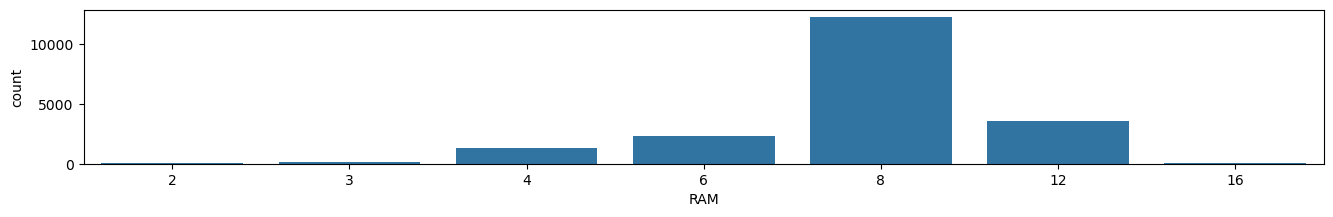

In [734]:
plt.figure(figsize=(16,2))
sns.barplot(df['RAM'].value_counts().sort_values(ascending=False))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

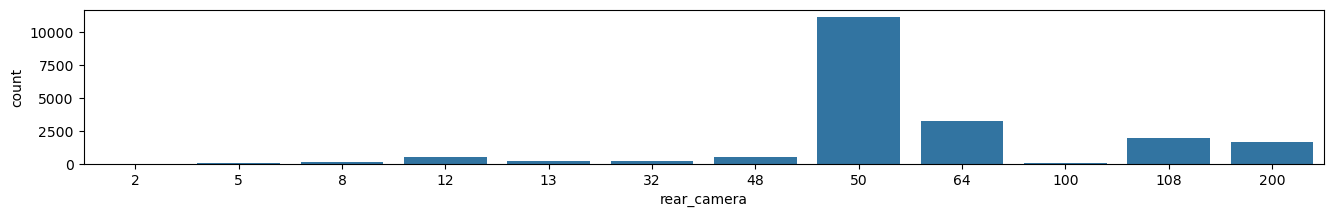

In [735]:
# rear Camera as Mega pixle
plt.figure(figsize=(16,2))
sns.barplot(df['rear_camera'].value_counts().sort_values(ascending=False))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

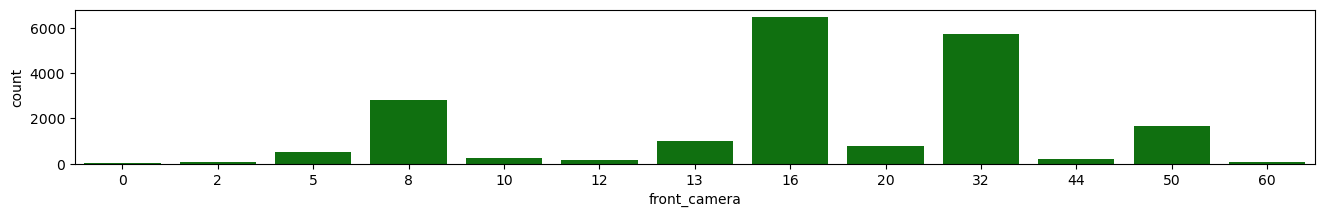

In [736]:
# front Camera as Mega pixle
plt.figure(figsize=(16,2))
sns.barplot(df['front_camera'].value_counts().sort_values(ascending=False),color='green')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

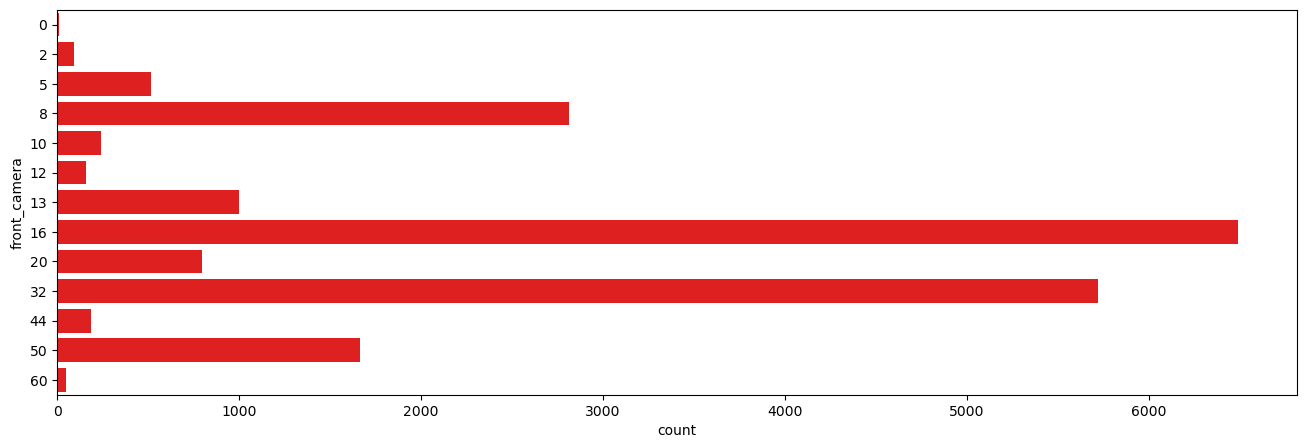

In [737]:
# front Camera as Mega pixle
plt.figure(figsize=(16,5))
sns.barplot(df['front_camera'].value_counts().sort_values(ascending=False),orient='h',color='red')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

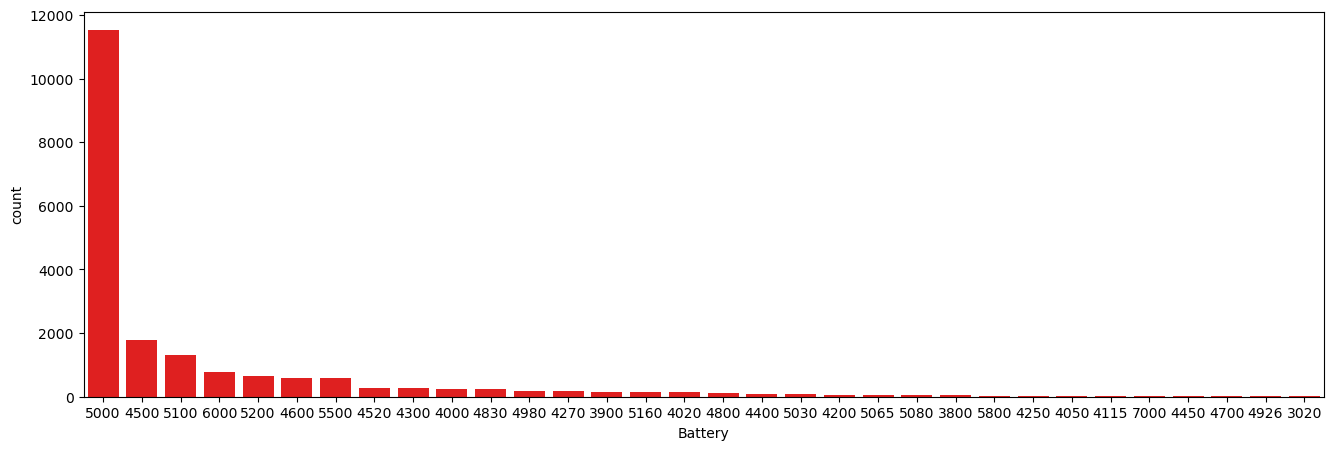

In [738]:
# bettery 
plt.figure(figsize=(16,5))
sns.barplot(df['Battery'].value_counts().sort_values(ascending=False),color='red')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

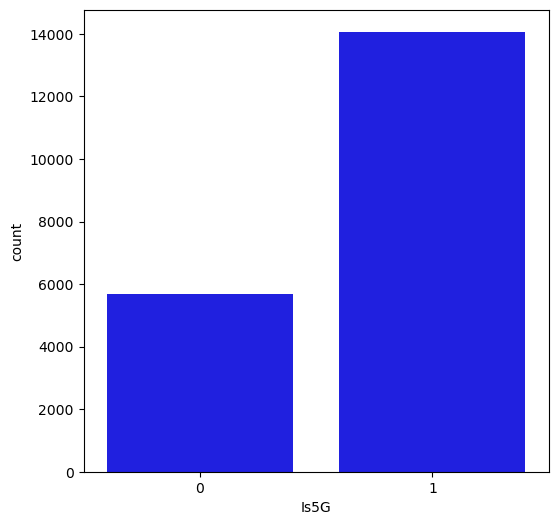

In [739]:
# is 5G 
plt.figure(figsize=(6,6))
sns.barplot(df['Is5G'].value_counts().sort_values(ascending=False),color='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

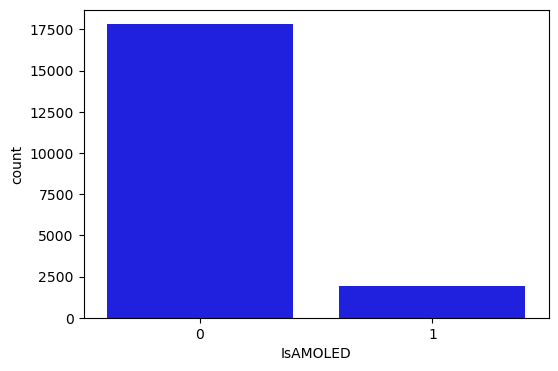

In [740]:
# is amoled
plt.figure(figsize=(6,4))
sns.barplot(df['IsAMOLED'].value_counts().sort_values(ascending=False),color='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

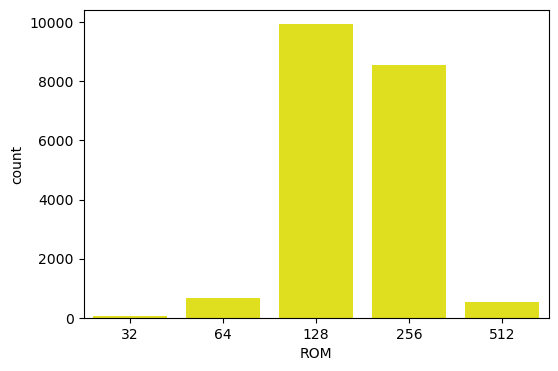

In [741]:
# is ROM
plt.figure(figsize=(6,4))
sns.barplot(df['ROM'].value_counts().sort_values(ascending=False),color='yellow')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

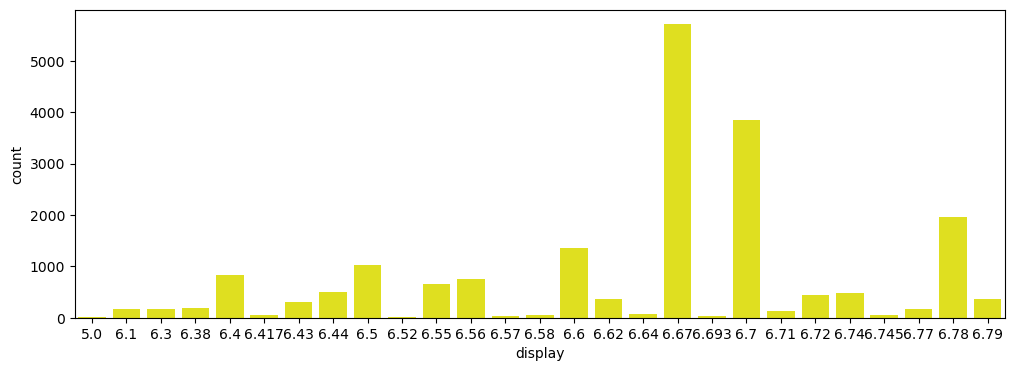

In [742]:
# is Display
plt.figure(figsize=(12,4))
sns.barplot(df['display'].value_counts().sort_values(ascending=False),color='yellow')
plt.show

### Distribution 

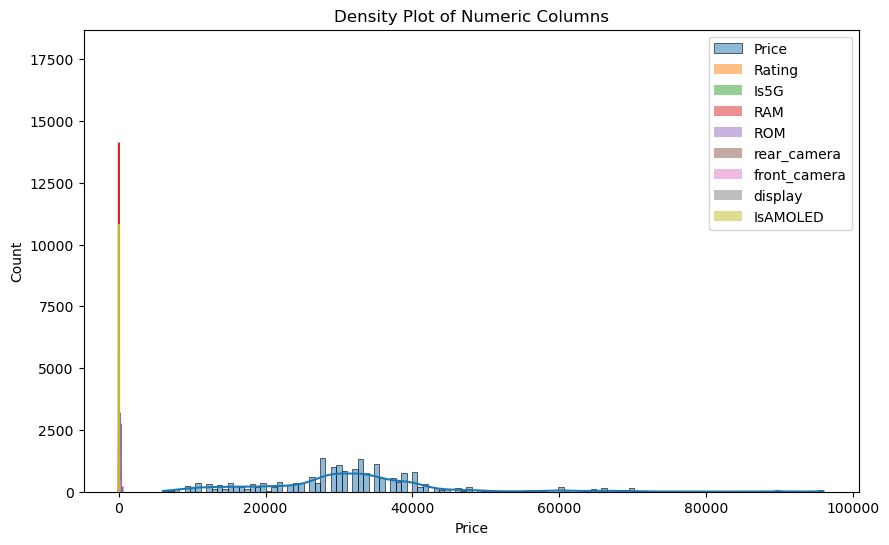

In [743]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Plot KDEs
plt.figure(figsize=(10, 6))
for col in numeric_cols:
    sns.histplot(df[col], label=col, fill=True,kde= True)
plt.legend()
plt.title("Density Plot of Numeric Columns")
plt.show()

In [744]:
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))  # Adjust rows/cols
# axes = axes.flatten()

# for i, col in enumerate(numeric_cols):
#     sns.histplot(df[col], ax=axes[i], kde=True)
#     axes[i].set_title(col)
# plt.show()

In [745]:
df.head()

,Price,Rating,Battery,Processor,Brand,Is5G,RAM,ROM,rear_camera,front_camera,display,IsAMOLED
0,31999,4.5,5500,Snapdragon 7 Gen 3 Processor,vivo,1,8,256,50,16,6.77,1
1,31999,4.5,5500,Snapdragon 7 Gen 3 Processor,vivo,1,8,256,50,16,6.77,1
2,32999,4.3,5000,Snapdragon 7 Gen 1 Accelerated Edition Processor,MOTOROLA,0,8,256,50,32,6.67,0
3,32999,4.3,5000,Snapdragon 7 Gen 1 Accelerated Edition Processor,MOTOROLA,0,8,256,50,32,6.67,0
4,32999,4.3,5100,7s Gen 2 Mobile Platform 5G Processor,REDMI,1,12,256,200,16,6.67,0


In [746]:
df[df['Processor'].str.contains('Domestic Warranty')]


,Price,Rating,Battery,Processor,Brand,Is5G,RAM,ROM,rear_camera,front_camera,display,IsAMOLED
20643,20999,4.3,5000,1 Year Domestic Warranty for Phone and 6 Month...,realme,1,8,128,50,16,6.67,1
21627,20999,4.3,5000,1 Year Domestic Warranty for Phone and 6 Month...,realme,1,8,128,50,16,6.67,1
22611,20999,4.3,5000,1 Year Domestic Warranty for Phone and 6 Month...,realme,1,8,128,50,16,6.67,1
23595,20999,4.3,5000,1 Year Domestic Warranty for Phone and 6 Month...,realme,1,8,128,50,16,6.67,1
24579,20999,4.3,5000,1 Year Domestic Warranty for Phone and 6 Month...,realme,1,8,128,50,16,6.67,1
25563,20999,4.3,5000,1 Year Domestic Warranty for Phone and 6 Month...,realme,1,8,128,50,16,6.67,1
26547,20999,4.3,5000,1 Year Domestic Warranty for Phone and 6 Month...,realme,1,8,128,50,16,6.67,1
27531,20999,4.3,5000,1 Year Domestic Warranty for Phone and 6 Month...,realme,1,8,128,50,16,6.67,1
28515,20999,4.3,5000,1 Year Domestic Warranty for Phone and 6 Month...,realme,1,8,128,50,16,6.67,1


### Feature Engineering

In [747]:
# Preprocessing data / Scaling 
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load dataset (replace with actual path)

# Ensure categorical columns are strings
df['Processor'] = df['Processor'].astype(str)
df['Brand'] = df['Brand'].astype(str)

# Identify columns
categorical_cols = ['Processor', 'Brand']
numerical_cols = ['Rating', 'Battery', 'Is5G', 'RAM', 'ROM', 'rear_camera', 'front_camera', 'display', 'IsAMOLED']

# Define ColumnTransformer
preprocessor = ColumnTransformer([
    ('num_scaling', StandardScaler(), numerical_cols),  # Standard scaling for numerical features
    ('cat_encoding', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # OneHotEncoding for categorical
])

# Apply transformations and ensure it is a NumPy array
transformed_data = preprocessor.fit_transform(df).toarray()



# Get column names
encoded_col_names = preprocessor.named_transformers_['cat_encoding'].get_feature_names_out(categorical_cols)
all_columns = numerical_cols + list(encoded_col_names)
# price scaller 
  # Scale the price separately

# Save the price scaler
joblib.dump(price_scaler, 'price_scaler.pkl')

# Convert transformed data to DataFrame
df_transformed = pd.DataFrame(transformed_data, columns=all_columns)
price_scaler = StandardScaler()
df_transformed['Price'] = price_scaler.fit_transform(df[['Price']])
joblib.dump(price_scaler, 'price_scaler.pkl')
joblib.dump(preprocessor, 'preprocessing_pipeline.pkl')
# Show transformed dataset
print(df_transformed.head())

     Rating   Battery      Is5G       RAM       ROM  rear_camera  \
0  1.635652  1.484932  0.634867 -0.084254  0.762751    -0.419247   
1  1.635652  1.484932  0.634867 -0.084254  0.762751    -0.419247   
2  0.202319  0.137414 -1.575133 -0.084254  0.762751    -0.419247   
3  0.202319  0.137414 -1.575133 -0.084254  0.762751    -0.419247   
4  0.202319  0.406918  0.634867  1.740489  0.762751     2.924534   

   front_camera   display  IsAMOLED  \
0     -0.497161  1.078190  3.029154   
1     -0.497161  1.078190  3.029154   
2      0.770488  0.266621 -0.330125   
3      0.770488  0.266621 -0.330125   
4     -0.497161  0.266621 -0.330125   

   Processor_1 Year Domestic Warranty for Phone and 6 Months Warranty for In-Box Accessories  \
0                                                0.0                                           
1                                                0.0                                           
2                                                0.0                

In [748]:
df_transformed.head()

,Rating,Battery,Is5G,RAM,ROM,rear_camera,front_camera,display,IsAMOLED,Processor_1 Year Domestic Warranty for Phone and 6 Months Warranty for In-Box Accessories,...,Brand_POCO,Brand_REDMI,Brand_SAMSUNG,Brand_Samsung,Brand_Tecno,Brand_Xiaomi,Brand_itel,Brand_realme,Brand_vivo,Price
0,1.635652,1.484932,0.634867,-0.084254,0.762751,-0.419247,-0.497161,1.078190,3.029154,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.028562
1,1.635652,1.484932,0.634867,-0.084254,0.762751,-0.419247,-0.497161,1.078190,3.029154,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.028562
2,0.202319,0.137414,-1.575133,-0.084254,0.762751,-0.419247,0.770488,0.266621,-0.330125,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106167
3,0.202319,0.137414,-1.575133,-0.084254,0.762751,-0.419247,0.770488,0.266621,-0.330125,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106167
4,0.202319,0.406918,0.634867,1.740489,0.762751,2.924534,-0.497161,0.266621,-0.330125,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106167


In [749]:
temp2 = df_transformed.copy()
temp2.to_csv('Mobile_tranformed_Data.csv')

### Training the Model :

In [750]:
from sklearn.model_selection import train_test_split 
X = df_transformed.drop(columns=['Price'])
y = df_transformed['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [751]:
y_train.head()


2929     0.261376
14585    2.201497
9932    -0.126648
6492    -0.281857
14641    0.649400
Name: Price, dtype: float64

In [752]:
# use random forest for this 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
joblib.dump(model,'prediction_model')

['prediction_model']

In [753]:
y_pred = model.predict(X_test)

In [754]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE:", mse)
print("R² Score  :", r2)


MSE: 0.0014061481004439356
R² Score  : 0.9986752860550545


### Cheak for overfitting

In [755]:

y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate on test set

y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results

print("Training MSE:", mse_train)
print("Training R² Score:", r2_train)
print("Test MSE:", mse_test)
print("Test R² Score:", r2_test)

# Check for overfitting

# if r2_train > 0.90 and r2_test < 0.75:
#     print("Warning: Model is overfitting!")
# elif r2_train < 0.60 and r2_test < 0.60:
#     print("Model is underfitting.")
# else:
#     print("Model is generalizing well.")

Training MSE: 0.0012010155428933394
Training R² Score: 0.9987797068871054
Test MSE: 0.0014061481004439356
Test R² Score: 0.9986752860550545


In [756]:
import joblib
import pandas as pd

# Load the saved pipeline
preprocessor = joblib.load('preprocessing_pipeline.pkl')

# Example new data (replace with actual input)
new_data = pd.DataFrame({
    'Processor': ['Snapdragon 888'],
    'Brand': ['Samsung'],
    'Price': [25555],
    'Rating': [4.5],
    'Battery': [4500],
    'Is5G': [1],
    'RAM': [8],
    'ROM': [128],
    'rear_camera': [64],
    'front_camera': [32],
    'display': [6.7],
    'IsAMOLED': [1]
})

# Ensure correct data types
new_data['Processor'] = new_data['Processor'].astype(str)
new_data['Brand'] = new_data['Brand'].astype(str)

# Transform the new input using the saved pipeline
processed_input = preprocessor.transform(new_data)

print("Processed Input Ready for Prediction:")
print(processed_input)


Processed Input Ready for Prediction:
  (0, 0)	1.6356522258193702
  (0, 1)	-1.2101040181610139
  (0, 2)	0.634867031615493
  (0, 3)	-0.0842537276896685
  (0, 4)	-0.7446916562241638
  (0, 5)	-0.10716044125941272
  (0, 6)	0.7704880243494764
  (0, 7)	0.5100917735915919
  (0, 8)	3.0291538745788875
  (0, 157)	1.0


In [757]:
import joblib
import pandas as pd
import numpy as np

# Load the saved pipeline and trained model
preprocessor = joblib.load('preprocessing_pipeline.pkl')
price_scaler = joblib.load('price_scaler.pkl')
model = joblib.load('prediction_model')

# Example new data (EXCLUDE 'Price')
new_data = pd.DataFrame({
    'Processor': ['Dimensity 6400 Processor'],
    'Brand': ['realme'],
    'Rating': [4.5],
    'Battery': [6000],
    'Is5G': [1],
    'RAM': [6],
    'ROM': [128],
    'rear_camera': [50],
    'front_camera': [8],
    'display': [6.7],
    'IsAMOLED': [0]
})

# Ensure correct data types
new_data['Processor'] = new_data['Processor'].astype(str)
new_data['Brand'] = new_data['Brand'].astype(str)

# Transform input using the saved preprocessing pipeline
processed_input = preprocessor.transform(new_data)

# Make a scaled prediction
predicted_price_scaled = model.predict(processed_input)

# Convert back to original price range
predicted_price = price_scaler.inverse_transform(np.array(predicted_price_scaled).reshape(-1, 1))

print("Predicted Price: ₹",predicted_price[0][0])  # Final price prediction

Predicted Price: ₹ 18903.999999999985


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
